In [6]:
from QCloud import *
import gymnasium as gym
from stable_baselines3 import PPO  # Or SAC / TD3, as desired
from stable_baselines3.common.env_checker import check_env
import numpy as np

class SaveTrainingStatsCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.rewards = []
        self.entropies = []
        
    def _on_step(self) -> bool:
        # Collect reward and entropy loss
        reward = np.mean(self.locals["rewards"])
        entropy = float(self.model.logger.name_to_value["train/entropy_loss"])
        
        self.rewards.append(reward)
        self.entropies.append(entropy)
        return True

# Create callback
stats_callback = SaveTrainingStatsCallback()

PRINTLOG = False
ibm_strasbourg = IBM_Strasbourg(env=None, name="ibm_strasbourg", cali_filepath='QCloud/calibration/03_2025/ibm_strasbourg_calibrations_2025-03-29T05_16_26Z.csv', printlog = PRINTLOG)
ibm_brussels = IBM_Brussels(env=None, name="ibm_brussels", cali_filepath='QCloud/calibration/03_2025/ibm_brussels_calibrations_2025-03-30T02_20_13Z.csv', printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="ibm_kyiv", cali_filepath='QCloud/calibration/03_2025/ibm_kyiv_calibrations_2025-03-30T02_24_45Z.csv', printlog = PRINTLOG)
ibm_quebec = IBM_Quebec(env=None, name="ibm_quebec", cali_filepath='QCloud/calibration/03_2025/ibm_quebec_calibrations_2025-03-30T02_51_33Z.csv', printlog = PRINTLOG)
ibm_kawasaki = IBM_Kawasaki(env=None, name="ibm_kawasaki", cali_filepath='QCloud/calibration/03_2025/ibm_kawasaki_calibrations_2025-03-30T03_15_05Z.csv', printlog = PRINTLOG)

devices = [ibm_strasbourg, ibm_brussels, ibm_kyiv, ibm_quebec, ibm_kawasaki]

# (Assume 'devices' is a list of device objects and 'job_records_manager' is defined.)
gymenv = QCloudGymEnv(devices, job_records_manager, printlog=True)

# Check that the environment follows Gymnasium's interface.
check_env(gymenv)

# Create a PPO agent with a simple multi-layer perceptron policy.
model = PPO("MlpPolicy", gymenv, verbose=1)

# Train the agent over many timesteps.
model.learn(total_timesteps=100000, callback=stats_callback)
# Save the trained model.
model.save("qcloud_ppo_model-new")

/Users/wolfwalker/anaconda3/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:421: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf. https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.345    |
| time/              |          |
|    fps             | 5503     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1           |
|    ep_rew_mean          | 0.421       |
| time/                   |             |
|    fps                  | 3887        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.089363605 |
|    clip_fraction        | 0.614       |
|    clip_range           | 0.2         |
|    entropy_loss   

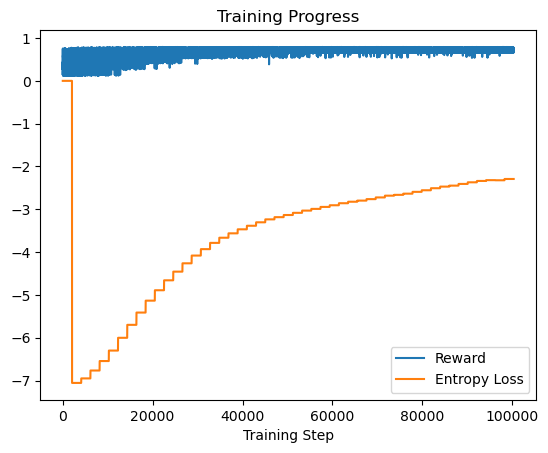

In [7]:
# Plot after training
import matplotlib.pyplot as plt

plt.plot(stats_callback.rewards, label="Reward")
plt.plot(stats_callback.entropies, label="Entropy Loss")
plt.legend()
plt.xlabel("Training Step")
plt.title("Training Progress")
plt.show()


FONTSIZE = 14

# Example data (replace with your actual data)
training_steps = [
    2048, 4096, 6144, 8192, 10240, 12288, 14336, 16384, 18432, 20480,
    22528, 24576, 26624, 28672, 30720, 32768, 34816, 36864, 38912, 40960,
    43008, 45056, 47104, 49152, 51200, 53248, 55296, 57344, 59392, 61440,
    63488, 65536, 67584, 69632, 71680, 73728, 75776, 77824, 79872, 81920,
    83968, 86016, 88064, 90112, 92160, 94208, 96256, 98304, 100352
]

rewards = [
    0.352, 0.393, 0.460, 0.533, 0.546, 0.580, 0.619, 0.625, 0.654, 0.675,
    0.680, 0.695, 0.691, 0.702, 0.698, 0.706, 0.705, 0.703, 0.710, 0.707,
    0.709, 0.714, 0.711, 0.708, 0.706, 0.710, 0.712, 0.712, 0.704, 0.711,
    0.707, 0.707, 0.711, 0.709, 0.712, 0.711, 0.711, 0.712, 0.711, 0.712,
    0.708, 0.705, 0.710, 0.716, 0.713, 0.706, 0.707, 0.717, 0.712
]

entropy_losses = [
    -7.07, -7.07, -6.98, -6.82, -6.59, -6.33, -6.05, -5.74, -5.46, -5.19,
    -4.93, -4.68, -4.47, -4.27, -4.09, -3.92, -3.77, -3.63, -3.51, -3.4,
    -3.3, -3.21, -3.13, -3.05, -2.95, -2.88, -2.83, -2.76, -2.71, -2.67,
    -2.64, -2.62, -2.6, -2.54, -2.49, -2.44, -2.4, -2.36, -2.34, -2.31,
    -2.27, -2.24, -2.22, -2.21, -2.18, -2.16, -2.14, -2.13, -2.11
]

# Plotting
fig, ax1 = plt.subplots(figsize=(6.5, 4.5))

# Left y-axis: Average Episode Reward
color = 'tab:blue'
ax1.set_xlabel('Training Steps', fontsize=FONTSIZE)
ax1.set_ylabel('Average Episode Reward', color=color, fontsize=FONTSIZE)
ln1 = ax1.plot(training_steps, rewards, color=color, marker='o', label='Average Episode Reward')
ax1.tick_params(axis='y', labelcolor=color, labelsize = FONTSIZE)
ax1.tick_params(axis='x', labelsize=FONTSIZE)
ax1.grid(True, linestyle='--', linewidth=0.5)

# Right y-axis: Entropy Loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Entropy Loss', color=color, fontsize=FONTSIZE)
ln2 = ax2.plot(training_steps, entropy_losses, color=color, marker='d', label='Entropy Loss')
ax2.tick_params(axis='y', labelcolor=color, labelsize = FONTSIZE)
lines = ln1 + ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', fontsize=FONTSIZE)
# Title and layout
# plt.title('PPO Training Progress: Average Episode Reward vs Entropy Loss')
fig.tight_layout()

# Show the plot
plt.show()

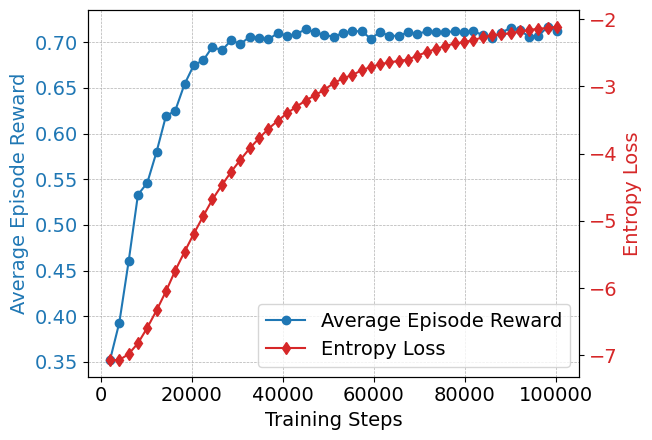

In [28]:
import matplotlib.pyplot as plt

FONTSIZE = 14

# Example data (replace with your actual data)
training_steps = [
    2048, 4096, 6144, 8192, 10240, 12288, 14336, 16384, 18432, 20480,
    22528, 24576, 26624, 28672, 30720, 32768, 34816, 36864, 38912, 40960,
    43008, 45056, 47104, 49152, 51200, 53248, 55296, 57344, 59392, 61440,
    63488, 65536, 67584, 69632, 71680, 73728, 75776, 77824, 79872, 81920,
    83968, 86016, 88064, 90112, 92160, 94208, 96256, 98304, 100352
]

rewards = [
    0.352, 0.393, 0.460, 0.533, 0.546, 0.580, 0.619, 0.625, 0.654, 0.675,
    0.680, 0.695, 0.691, 0.702, 0.698, 0.706, 0.705, 0.703, 0.710, 0.707,
    0.709, 0.714, 0.711, 0.708, 0.706, 0.710, 0.712, 0.712, 0.704, 0.711,
    0.707, 0.707, 0.711, 0.709, 0.712, 0.711, 0.711, 0.712, 0.711, 0.712,
    0.708, 0.705, 0.710, 0.716, 0.713, 0.706, 0.707, 0.717, 0.712
]

entropy_losses = [
    -7.07, -7.07, -6.98, -6.82, -6.59, -6.33, -6.05, -5.74, -5.46, -5.19,
    -4.93, -4.68, -4.47, -4.27, -4.09, -3.92, -3.77, -3.63, -3.51, -3.4,
    -3.3, -3.21, -3.13, -3.05, -2.95, -2.88, -2.83, -2.76, -2.71, -2.67,
    -2.64, -2.62, -2.6, -2.54, -2.49, -2.44, -2.4, -2.36, -2.34, -2.31,
    -2.27, -2.24, -2.22, -2.21, -2.18, -2.16, -2.14, -2.13, -2.11
]

# Plotting
fig, ax1 = plt.subplots(figsize=(6.5, 4.5))

# Left y-axis: Average Episode Reward
color = 'tab:blue'
ax1.set_xlabel('Training Steps', fontsize=FONTSIZE)
ax1.set_ylabel('Average Episode Reward', color=color, fontsize=FONTSIZE)
ln1 = ax1.plot(training_steps, rewards, color=color, marker='o', label='Average Episode Reward')
ax1.tick_params(axis='y', labelcolor=color, labelsize = FONTSIZE)
ax1.tick_params(axis='x', labelsize=FONTSIZE)
ax1.grid(True, linestyle='--', linewidth=0.5)

# Right y-axis: Entropy Loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Entropy Loss', color=color, fontsize=FONTSIZE)
ln2 = ax2.plot(training_steps, entropy_losses, color=color, marker='d', label='Entropy Loss')
ax2.tick_params(axis='y', labelcolor=color, labelsize = FONTSIZE)
lines = ln1 + ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', fontsize=FONTSIZE)
# Title and layout
# plt.title('PPO Training Progress: Average Episode Reward vs Entropy Loss')
fig.tight_layout()

# Show the plot
plt.show()

In [26]:
class SaveTrainingStatsCallback(BaseCallback):
    def __init__(self, verbose=1):
        super().__init__(verbose)
        self.timesteps = []
        self.rewards = []
        self.entropies = []

    def _on_step(self) -> bool:
        return True  # No per-step logging needed
    
    def _on_rollout_end(self):
        # Safe to access at the end of each rollout
        total_timesteps = self.num_timesteps
        self.timesteps.append(total_timesteps)

        # Safer extraction of metrics
        ep_rew_mean = self.logger.name_to_value.get("rollout/ep_rew_mean", None)
        entropy_loss = self.logger.name_to_value.get("train/entropy_loss", None)

        self.rewards.append(ep_rew_mean if ep_rew_mean is not None else float("nan"))
        self.entropies.append(entropy_loss if entropy_loss is not None else float("nan"))

        if self.verbose:
            print(f"[{total_timesteps}] Reward: {ep_rew_mean}, Entropy: {entropy_loss}")

In [27]:
# Create callback
stats_callback = SaveTrainingStatsCallback()

PRINTLOG = False
ibm_strasbourg = IBM_Strasbourg(env=None, name="ibm_strasbourg", cali_filepath='QCloud/calibration/03_2025/ibm_strasbourg_calibrations_2025-03-29T05_16_26Z.csv', printlog = PRINTLOG)
ibm_brussels = IBM_Brussels(env=None, name="ibm_brussels", cali_filepath='QCloud/calibration/03_2025/ibm_brussels_calibrations_2025-03-30T02_20_13Z.csv', printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="ibm_kyiv", cali_filepath='QCloud/calibration/03_2025/ibm_kyiv_calibrations_2025-03-30T02_24_45Z.csv', printlog = PRINTLOG)
ibm_quebec = IBM_Quebec(env=None, name="ibm_quebec", cali_filepath='QCloud/calibration/03_2025/ibm_quebec_calibrations_2025-03-30T02_51_33Z.csv', printlog = PRINTLOG)
ibm_kawasaki = IBM_Kawasaki(env=None, name="ibm_kawasaki", cali_filepath='QCloud/calibration/03_2025/ibm_kawasaki_calibrations_2025-03-30T03_15_05Z.csv', printlog = PRINTLOG)

devices = [ibm_strasbourg, ibm_brussels, ibm_kyiv, ibm_quebec, ibm_kawasaki]

# (Assume 'devices' is a list of device objects and 'job_records_manager' is defined.)
gymenv = QCloudGymEnv(devices, job_records_manager, printlog=True)

# Check that the environment follows Gymnasium's interface.
check_env(gymenv)

# Create a PPO agent with a simple multi-layer perceptron policy.
model = PPO("MlpPolicy", gymenv, verbose=1)

# Train the agent over many timesteps.
model.learn(total_timesteps=10000, callback=stats_callback)
# Save the trained model.
model.save("qcloud_ppo_model-new")

/Users/wolfwalker/anaconda3/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:421: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf. https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
[2048] Reward: None, Entropy: None
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.388    |
| time/              |          |
|    fps             | 5830     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
[4096] Reward: None, Entropy: -7.075281971693039
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1           |
|    ep_rew_mean          | 0.417       |
| time/                   |             |
|    fps                  | 4031        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.059035033 |
|    clip_fraction  

In [25]:
print(stats_callback.timesteps)
print(stats_callback.rewards)
print(stats_callback.entropies)

[]
[]
[]


In [65]:
from QCloud import *
import gymnasium as gym
from stable_baselines3 import PPO  # Or SAC / TD3, as desired
from stable_baselines3.common.env_checker import check_env
import numpy as np

class SaveTrainingStatsCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.ep_rewards = []
        self.entropies = []
        
    def _on_step(self) -> bool:
        infos = self.locals["infos"]
        for info in infos:
            if "episode_reward" in info:
                self.ep_rewards.append(info["episode_reward"])
        
        entropy = float(self.model.logger.name_to_value["train/entropy_loss"])
        
        self.entropies.append(entropy)
        return True
    
    def _on_rollout_end(self):
        if self.ep_rewards:
            mean_rew = np.mean(self.ep_rewards[-10:])  # recent N episodes
            print(f"Manual ep_rew_mean: {mean_rew:.3f}")
# Create callback
stats_callback = SaveTrainingStatsCallback()

PRINTLOG = False
ibm_strasbourg = IBM_Strasbourg(env=None, name="ibm_strasbourg", cali_filepath='QCloud/calibration/03_2025/ibm_strasbourg_calibrations_2025-03-29T05_16_26Z.csv', printlog = PRINTLOG)
ibm_brussels = IBM_Brussels(env=None, name="ibm_brussels", cali_filepath='QCloud/calibration/03_2025/ibm_brussels_calibrations_2025-03-30T02_20_13Z.csv', printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="ibm_kyiv", cali_filepath='QCloud/calibration/03_2025/ibm_kyiv_calibrations_2025-03-30T02_24_45Z.csv', printlog = PRINTLOG)
ibm_quebec = IBM_Quebec(env=None, name="ibm_quebec", cali_filepath='QCloud/calibration/03_2025/ibm_quebec_calibrations_2025-03-30T02_51_33Z.csv', printlog = PRINTLOG)
ibm_kawasaki = IBM_Kawasaki(env=None, name="ibm_kawasaki", cali_filepath='QCloud/calibration/03_2025/ibm_kawasaki_calibrations_2025-03-30T03_15_05Z.csv', printlog = PRINTLOG)

devices = [ibm_strasbourg, ibm_brussels, ibm_kyiv, ibm_quebec, ibm_kawasaki]

# (Assume 'devices' is a list of device objects and 'job_records_manager' is defined.)
gymenv = QCloudGymEnv(devices, job_records_manager, printlog=True)

# Check that the environment follows Gymnasium's interface.
check_env(gymenv)

# Create a PPO agent with a simple multi-layer perceptron policy.
model = PPO("MlpPolicy", gymenv, verbose=1)

# Train the agent over many timesteps.
model.learn(total_timesteps=5000, callback=stats_callback)
# Save the trained model.
model.save("qcloud_ppo_model-new")

/Users/wolfwalker/anaconda3/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:421: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf. https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.349    |
| time/              |          |
|    fps             | 5652     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1          |
|    ep_rew_mean          | 0.419      |
| time/                   |            |
|    fps                  | 3971       |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.10340382 |
|    clip_fraction        | 0.605      |
|    clip_range           | 0.2        |
|    entropy_loss         | -7.06

In [66]:
plt.plot(stats_callback.rewards, label="Reward")
plt.legend()
plt.xlabel("Training Step")
plt.title("Training Progress")
plt.show()

AttributeError: 'SaveTrainingStatsCallback' object has no attribute 'rewards'

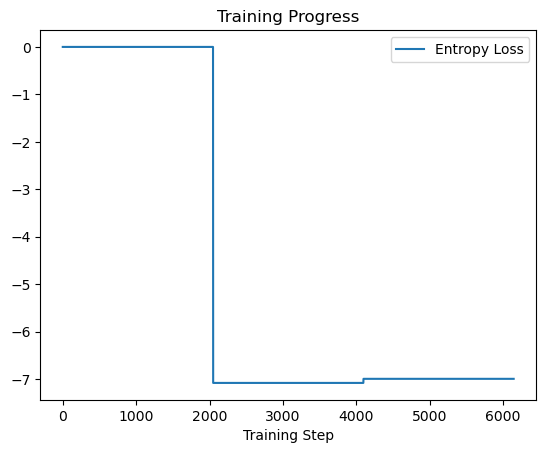

In [38]:
plt.plot(stats_callback.entropies, label="Entropy Loss")
plt.legend()
plt.xlabel("Training Step")
plt.title("Training Progress")
plt.show()